<a href="https://colab.research.google.com/github/naidu199/Machine_Learn/blob/main/ML_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#importing dataframe
data=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

data.iloc[:,:6]
df=data[0:5]
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.shape

(1067, 13)

In [5]:
x=data.ENGINESIZE
y=data.CO2EMISSIONS
len(x)

1067

In [6]:
#mean of the variables
mx=np.mean(x) #mean of x
my=np.mean(y) #mean of y
mx,my

(3.346298031865042, 256.2286785379569)

In [7]:
#finding m,c in y=mx+c
l=len(x)
num=0
den=0
for i in range(l):
  num+=(x[i]-mx)*(y[i]-my)
  den+=(x[i]-mx)**2
m=num/den
c=my-(m*mx) #mx is mean of x
m,c

(39.12519978671172, 125.30409949535692)

In [21]:
#Graph values
max_x=np.max(x)
min_x=np.min(x)
gx=np.linspace(min_x,max_x,10)
gy=(m*gx)+c

gx




array([1.        , 1.82222222, 2.64444444, 3.46666667, 4.28888889,
       5.11111111, 5.93333333, 6.75555556, 7.57777778, 8.4       ])

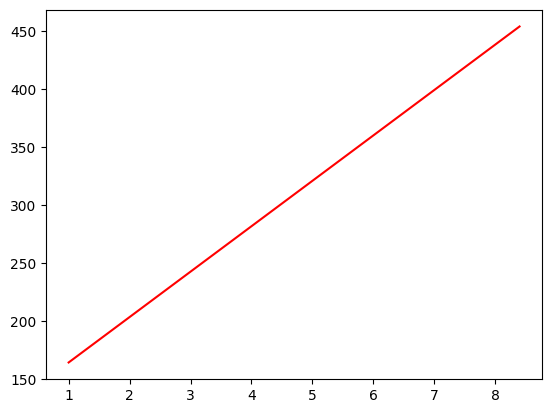

In [9]:
#Regression line
plt.plot(gx,gy,color="red")


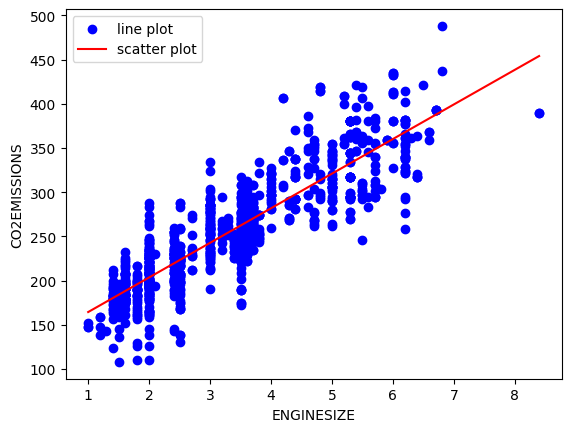

In [10]:
#Graph of linear regression
plt.scatter(x,y,color="blue",label="line plot" )
plt.plot(gx,gy,color="red",label="scatter plot")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.legend()




In [11]:
#R2 error value
n=0
d=0
for i in range(l):
  py=m*x[i]+c
  n+=(y[i]-py)**2
  d+=(y[i]-my)**2
r2=1-(n/d)
r2

0.7641458597854811

In [12]:
#MSE value
s=0
for i in range(l):
  py=m*x[i]+c
  s+=((y[i]-py)**2)
s/l



946.3140527188766

In [13]:
X=data.iloc[:,4:5].values
Y=data.iloc[:,-1].values
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [16]:
yp=lr.predict(xtest)
yp

array([343.61510708, 220.70719552, 220.70719552, 232.60150954,
       224.67196686, 300.00262233, 220.70719552, 268.28445161,
       220.70719552, 323.79125038, 268.28445161, 395.15713452,
       244.49582356, 300.00262233, 181.05948211, 284.14353697,
       315.8617077 , 188.98902479, 264.31968027, 387.22759184,
       196.91856747, 264.31968027, 264.31968027, 204.84811015,
       224.67196686, 244.49582356, 276.21399429, 335.6855644 ,
       343.61510708, 204.84811015, 347.57987843, 224.67196686,
       264.31968027, 244.49582356, 196.91856747, 188.98902479,
       351.54464977, 220.70719552, 232.60150954, 268.28445161,
       196.91856747, 196.91856747, 220.70719552, 204.84811015,
       343.61510708, 204.84811015, 220.70719552, 188.98902479,
       335.6855644 , 359.47419245, 311.89693636, 272.24922295,
       268.28445161, 196.91856747, 220.70719552, 188.98902479,
       307.93216502, 196.91856747, 252.42536624, 204.84811015,
       188.98902479, 224.67196686, 204.84811015, 335.68

In [17]:
ytest

array([356, 209, 230, 212, 168, 292, 212, 276, 202, 334, 313, 437, 224,
       281, 177, 260, 414, 223, 251, 359, 191, 189, 244, 242, 131, 283,
       274, 294, 246, 110, 359, 239, 229, 237, 191, 196, 294, 221, 237,
       237, 184, 184, 202, 194, 297, 198, 260, 179, 344, 359, 338, 288,
       290, 129, 230, 179, 283, 159, 258, 209, 207, 205, 225, 294, 262,
       299, 354, 230, 207, 124, 304, 189, 354, 270, 338, 216, 283, 179,
       235, 166, 186, 253, 161, 334, 407, 246, 191, 172, 290, 258, 262,
       209, 283, 342, 356, 368, 168, 221, 368, 262, 182, 320, 126, 166,
       202, 196, 200, 288, 191, 259, 214, 228, 269, 317, 327, 294, 292,
       244, 361, 200, 258, 191, 382, 147, 179, 310, 229, 237, 292, 264,
       230, 294, 184, 136, 344, 373, 283, 110, 198, 232, 262, 191, 342,
       368, 189, 175, 285, 345, 301, 138, 179, 251, 161, 235, 310, 242,
       292, 221, 324, 235, 177, 209, 177, 202, 242, 205, 264, 184, 400,
       334, 260, 285, 235, 301, 281, 276, 265, 242, 184, 345, 29

In [18]:
from sklearn.metrics import r2_score
r2_score(ytest,yp)

0.7245385677455163

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,yp)

1092.2931593041808

In [31]:
#max_x=np.max(x)
#min_x=np.min(x)
#gx=np.linspace(min_x,max_x,10)
#gy=(m*gx)+c

x_min=np.min(xtrain)
x_max=np.max(xtrain)
xg=np.linspace(x_min,x_max)
xg

array([1.        , 1.15102041, 1.30204082, 1.45306122, 1.60408163,
       1.75510204, 1.90612245, 2.05714286, 2.20816327, 2.35918367,
       2.51020408, 2.66122449, 2.8122449 , 2.96326531, 3.11428571,
       3.26530612, 3.41632653, 3.56734694, 3.71836735, 3.86938776,
       4.02040816, 4.17142857, 4.32244898, 4.47346939, 4.6244898 ,
       4.7755102 , 4.92653061, 5.07755102, 5.22857143, 5.37959184,
       5.53061224, 5.68163265, 5.83265306, 5.98367347, 6.13469388,
       6.28571429, 6.43673469, 6.5877551 , 6.73877551, 6.88979592,
       7.04081633, 7.19183673, 7.34285714, 7.49387755, 7.64489796,
       7.79591837, 7.94693878, 8.09795918, 8.24897959, 8.4       ])

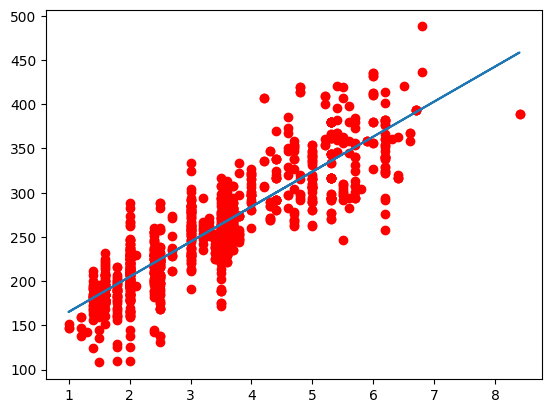

In [33]:
plt.plot(xtest,yp)
plt.scatter(X,Y,color="red")